#EDA


In [ ]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import SGD

In [ ]:
df = pd.read_csv("/content/DataLiIon_SuhuVoltase.xlsx - Sheet1.csv")

In [ ]:
df

,suhu,voltase,data ke,Unnamed: 3
0,42,4.026,1,NaN
1,42,4.026,2,NaN
2,42,4.026,3,NaN
3,43,4.163,4,NaN
4,43,4.152,5,NaN
...,...,...,...,...
715,36,4.393,716,NaN
716,36,4.393,717,NaN
717,36,4.393,718,NaN
718,36,4.396,719,NaN


In [ ]:
df = df.iloc[:,0:2]

In [ ]:
df.describe()

,suhu,voltase
count,720.000000,720.000000
mean,38.862500,4.377671
std,1.745006,0.119771
min,36.000000,4.026000
25%,38.000000,4.281000
50%,39.000000,4.414000
75%,39.000000,4.488000
max,43.000000,4.503000


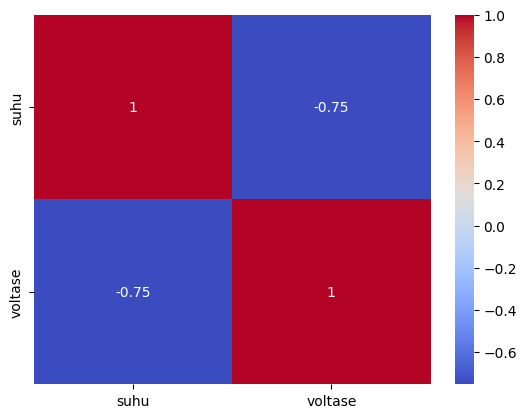

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

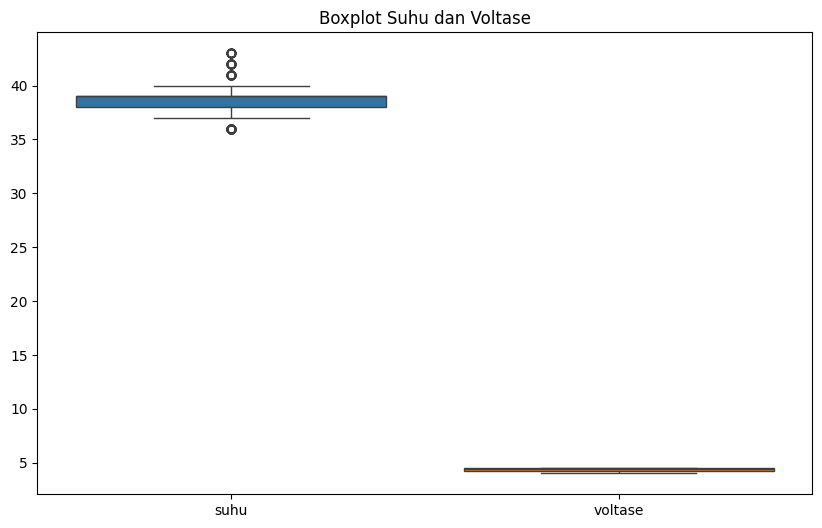

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot Suhu dan Voltase')
plt.show()

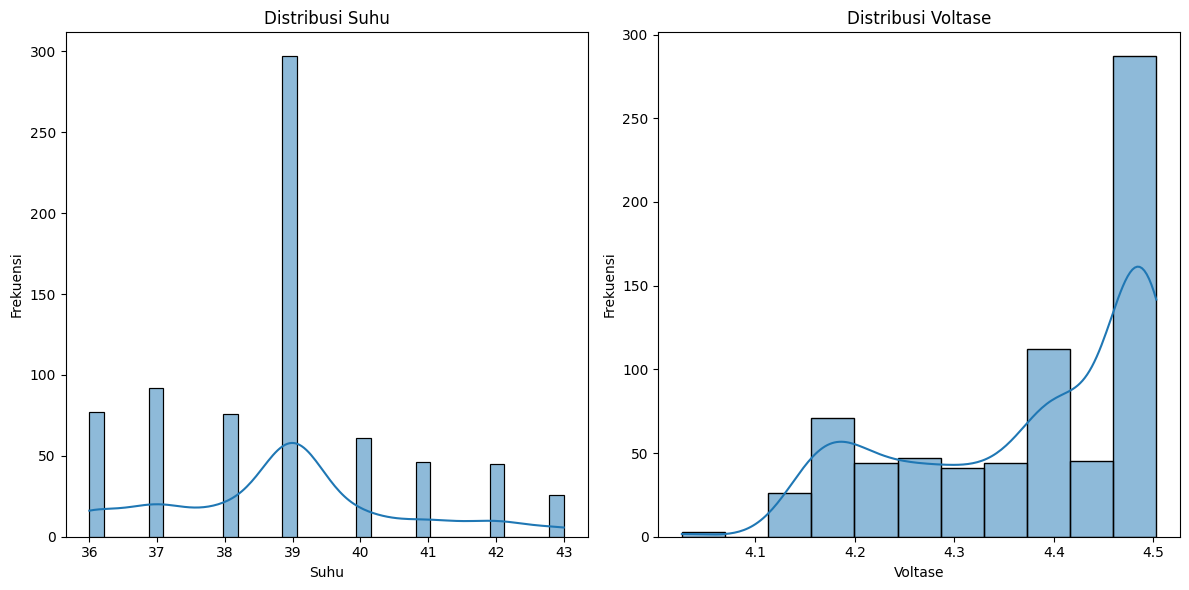

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['suhu'], kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.subplot(1, 2, 2)
sns.histplot(df['voltase'], kde=True)
plt.title('Distribusi Voltase')
plt.xlabel('Voltase')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

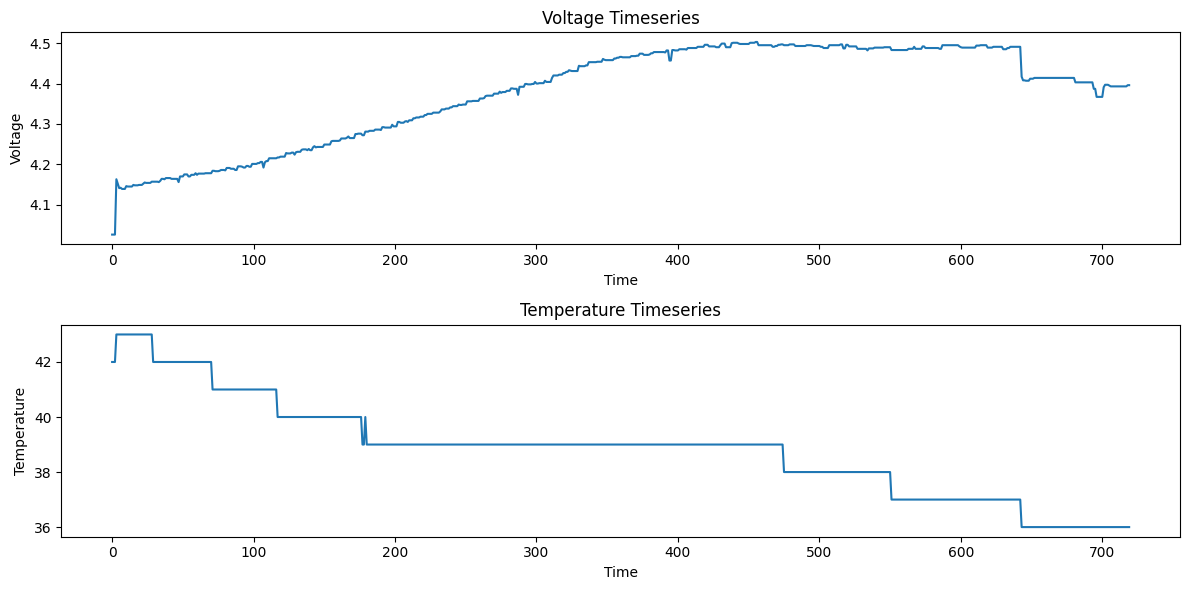

In [ ]:

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['voltase'])
plt.title('Voltage Timeseries')
plt.xlabel('Time')
plt.ylabel('Voltage')

plt.subplot(2, 1, 2)
plt.plot(df['suhu'])
plt.title('Temperature Timeseries')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#Transoformasi dan Pembagian Data

In [ ]:
data = df.values #ambil valuenya saja
scaler = MinMaxScaler()#lakukan minmax supaya di rentang [0,1]
data_scaled = scaler.fit_transform(data)#transformasi dengan minmax tadi
train_data, temp_data = train_test_split(data_scaled, train_size=0.7, shuffle=False)#70% train
val_data, test_data = train_test_split(temp_data, train_size=0.5, shuffle=False)#6% validasi dan 24% test
def create_sequences(data_x, data_y, seq_length):
    xs, ys = [], []
    for i in range(len(data_x) - seq_length):
        sequence_x = np.hstack([data_x[i:(i + seq_length)], np.expand_dims(data_y[i:(i + seq_length)], axis=1)])#buat seq x dan y saat waktu t
        #expandims maksudnya supaya data sequence tadi saat diinput berpa vektor yang banyaknya jadi 2 kolom, yakni x dan y saat waktu t untuk memprediksi y ke t+1
        xs.append(sequence_x)#urutan prediktor
        ys.append(data_y[i + seq_length])#target ke t+1
    return np.array(xs), np.array(ys)
seq_length = 1  # ini timestep, sebagai fondasi ketentuan bahwa data saat ini hanya bergantung tepat 1 waktu sebelumnya dan data saat ini hanya mempengaruhi data tepat satu waktu kedepannya
X_train, y_train = create_sequences(train_data[:, :-1], train_data[:, -1], seq_length)
X_val, y_val = create_sequences(val_data[:, :-1], val_data[:, -1], seq_length)
X_test, y_test = create_sequences(test_data[:, :-1], test_data[:, -1], seq_length)


#VARIASI 10, 0.01, 50

## TRAIN-VAL VARIASI 10, 0.01, 50

In [ ]:
# model2 keluarga rnn yang dipakai
def build_rnn_model(layer_type):
    model = Sequential()
    model.add(layer_type(50, activation='tanh', input_shape=(1, 2),return_sequences=True))##GANTI UNTUK VARIASI NEUORON
    model.add(layer_type(50, activation='tanh',return_sequences=True))
    model.add(layer_type(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=0.01), loss='mse')##GANTI UNTUK VARIASI LEARNING RATE
    return model
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(
        X_train, y_train,
        epochs=10,##GANTI UNTUK VARIASI EPOCHS##
        validation_data=(X_val, y_val),
        batch_size=1,
        verbose=1
    )
    histories[name] = history.history
    loss = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name} Loss: {loss}")


Training SimpleRNN...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0288 - val_loss: 1.5551e-04
Epoch 2/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6941e-04 - val_loss: 1.8827e-04
Epoch 3/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7286e-04 - val_loss: 1.8810e-04
Epoch 4/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3630e-04 - val_loss: 1.1857e-04
Epoch 5/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1844e-04 - val_loss: 2.1104e-04
Epoch 6/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4809e-04 - val_loss: 8.5502e-05
Epoch 7/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7471e-04 - val_loss: 7.2343e-05
Epoch 8/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5553e-04 - val_loss: 8.5177e-05
Epoch 9/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6094e-04 - val_loss: 5.3221e-05
Epoch 10/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5011e-04 - val_loss: 6.7888e-05
SimpleRNN Loss: 6.788797327317297e-05
Training GRU...
Epoch 1/10
502/502 ━

## PLOT TRAIN-VAL VARIASI 10, 0.01, 50

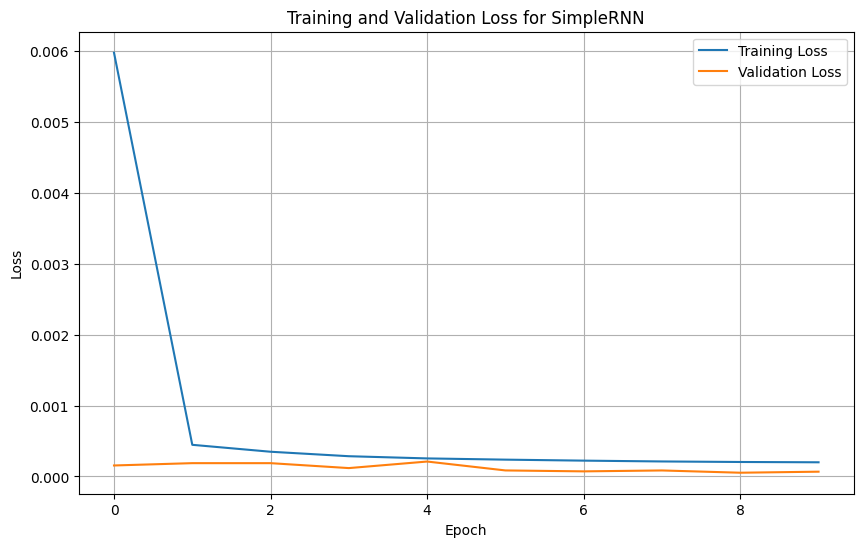

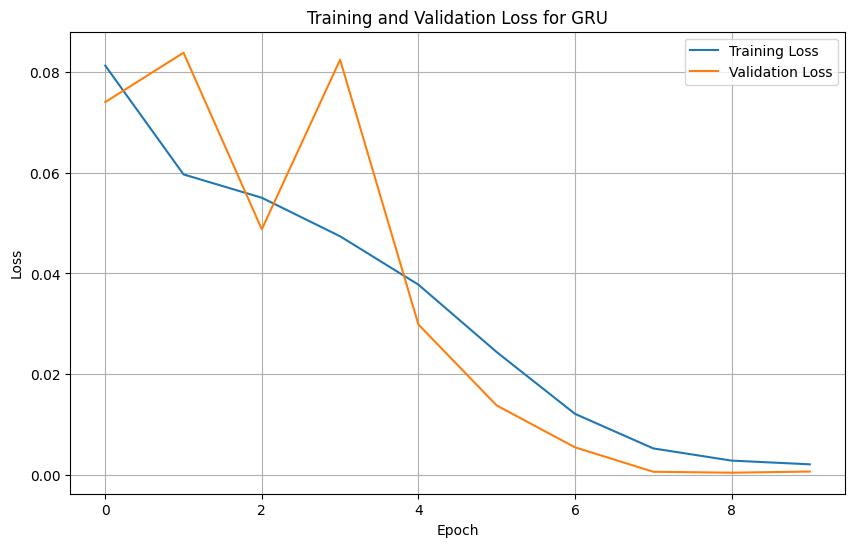

In [ ]:
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

##PLOT UJI DAN PERFORMA UJI VARIASI 10, 0.01, 50

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


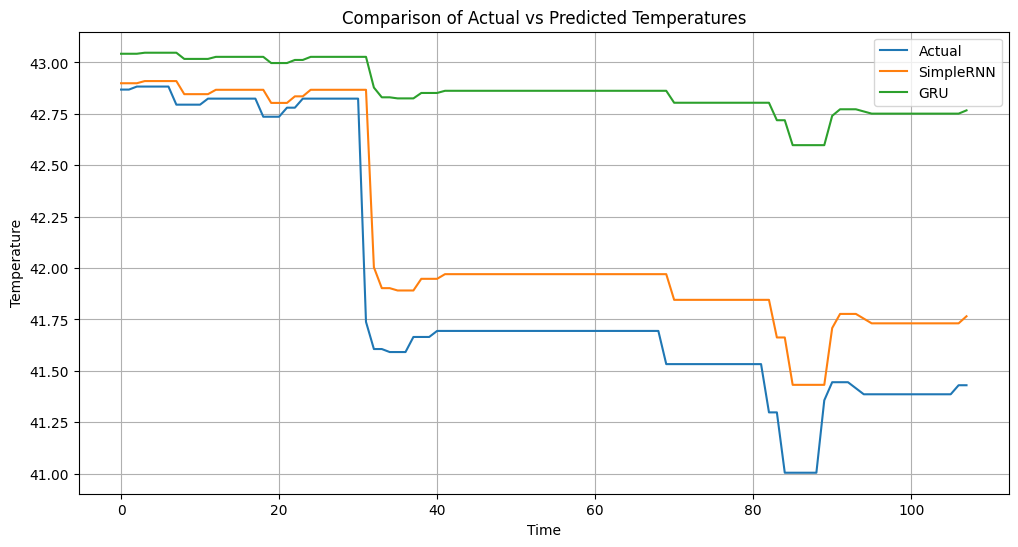

MSE for SimpleRNN: 0.08632809429633571
MSE for GRU: 1.1802622496656217


In [ ]:

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    mse = mean_squared_error(y_test_original, pred)
    print(f"MSE for {name}: {mse}")

# VARIASI 10, 0.01, 100

## TRAIN-VAL 10, 0.01, 100

In [ ]:

def build_rnn_model(layer_type):
    model = Sequential()
    #saat masih return sequences=T maka diberi aktivasi tanh di akhirnya
    #saat return sequences=F maka digunakan relu (khawatir nilai negatif padahal penggunaan gawai tidak pernah di bawah suhu 0)
    model.add(layer_type(100, activation='tanh', input_shape=(1, 2),return_sequences=True))##GANTI UNTUK VARIASI NEUORON
    model.add(layer_type(100, activation='tanh',return_sequences=True))
    model.add(layer_type(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=0.01), loss='mse')##GANTI UNTUK VARIASI LEARNING RATE
    return model
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(
        X_train, y_train,
        epochs=10,##GANTI UNTUK VARIASI EPOCHS##
        validation_data=(X_val, y_val),
        batch_size=1,
        verbose=1
    )
    histories[name] = history.history
    loss = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name} Loss: {loss}")


Training SimpleRNN...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0404 - val_loss: 0.0011
Epoch 2/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.7774e-04 - val_loss: 2.3194e-04
Epoch 3/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3888e-04 - val_loss: 1.7784e-04
Epoch 4/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8591e-04 - val_loss: 3.2561e-04
Epoch 5/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6666e-04 - val_loss: 2.5858e-04
Epoch 6/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1868e-04 - val_loss: 2.5027e-04
Epoch 7/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6571e-04 - val_loss: 2.5552e-04
Epoch 8/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.6187e-04 - val_loss: 1.7916e-04
Epoch 9/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5863e-04 - val_loss: 2.4278e-04
Epoch 10/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4983e-04 - val_loss: 2.5945e-04
SimpleRNN Loss: 0.00025945401284843683
Training GRU...
Epoch 1/10
502/502 ━━━━

## PLOT TRAIN-VAL 10, 0.01, 100

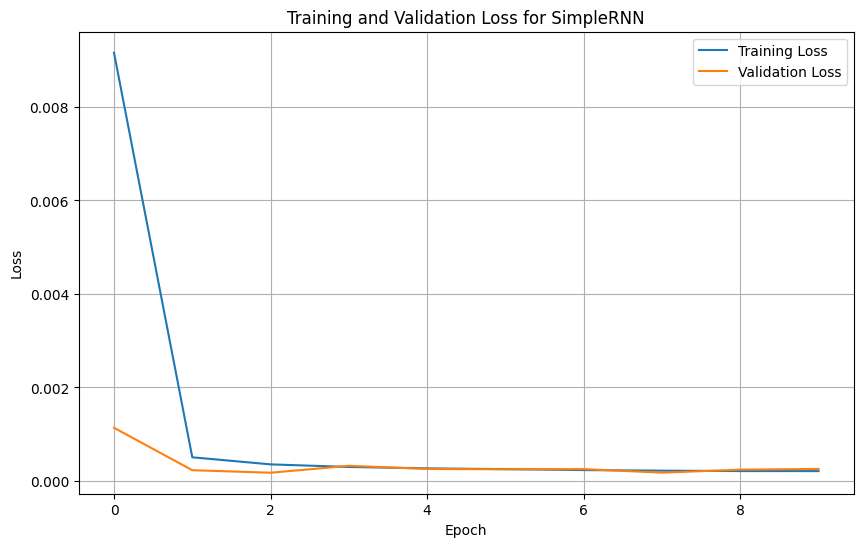

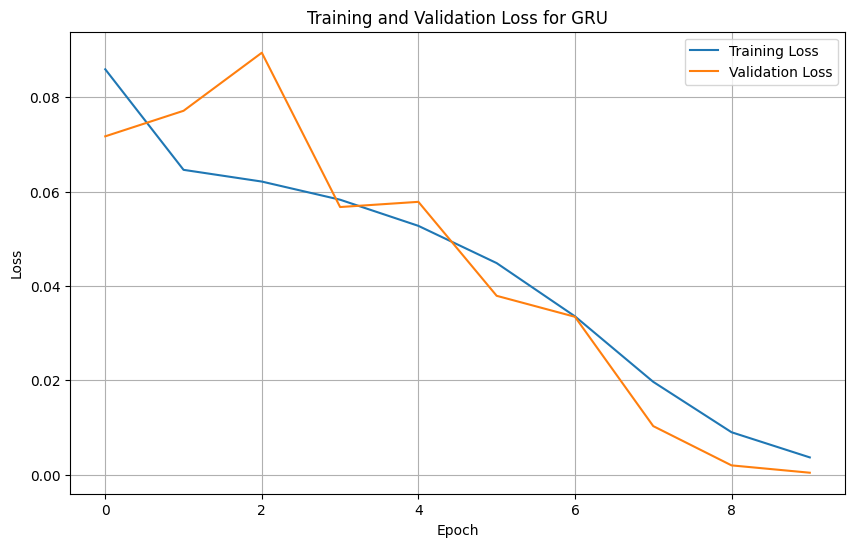

In [ ]:
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

##PLOT UJI DAN PEFRFORMA UJI 10, 0.01, 100

1/4 ━━━━━━━━━━━━━━━━━━━━ 2s 697ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step


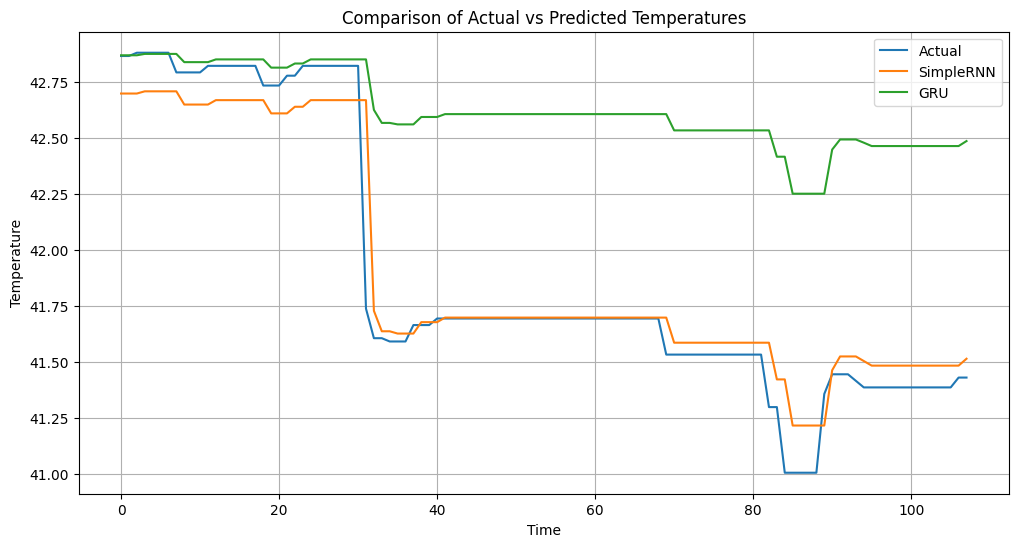

MSE for SimpleRNN: 0.02137272058002357
MSE for GRU: 0.7266585799218851


In [ ]:

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    mse = mean_squared_error(y_test_original, pred)
    print(f"MSE for {name}: {mse}")

#VARIASI 10, 0.02, 50

##VAL-TRAIN 10, 0.02, 50

In [ ]:

def build_rnn_model(layer_type):
    model = Sequential()
    model.add(layer_type(50, activation='tanh', input_shape=(1, 2),return_sequences=True))##GANTI UNTUK VARIASI NEUORON
    model.add(layer_type(50, activation='tanh',return_sequences=True))
    model.add(layer_type(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=0.02), loss='mse')##GANTI UNTUK VARIASI LEARNING RATE
    return model
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(
        X_train, y_train,
        epochs=10,##GANTI UNTUK VARIASI EPOCHS##
        validation_data=(X_val, y_val),
        batch_size=1,
        verbose=1
    )
    histories[name] = history.history
    loss = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name} Loss: {loss}")


Training SimpleRNN...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0304 - val_loss: 4.4509e-04
Epoch 2/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6971e-04 - val_loss: 1.9539e-04
Epoch 3/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0875e-04 - val_loss: 1.0988e-04
Epoch 4/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0552e-04 - val_loss: 4.0164e-05
Epoch 5/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4601e-04 - val_loss: 5.0692e-05
Epoch 6/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4710e-04 - val_loss: 4.2153e-05
Epoch 7/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7080e-04 - val_loss: 5.8282e-05
Epoch 8/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4665e-04 - val_loss: 9.0997e-05
Epoch 9/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1477e-04 - val_loss: 4.7858e-05
Epoch 10/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0296e-04 - val_loss: 5.5968e-05
SimpleRNN Loss: 5.59674808755517e-05
Training GRU...
Epoch 1/10
502/502 ━━

## PLOT VAL-TRAIN 10, 0.02, 50

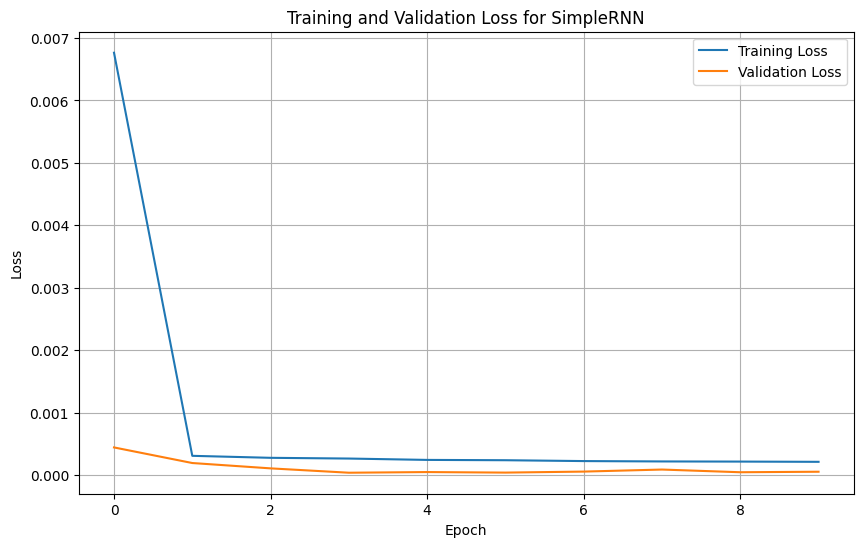

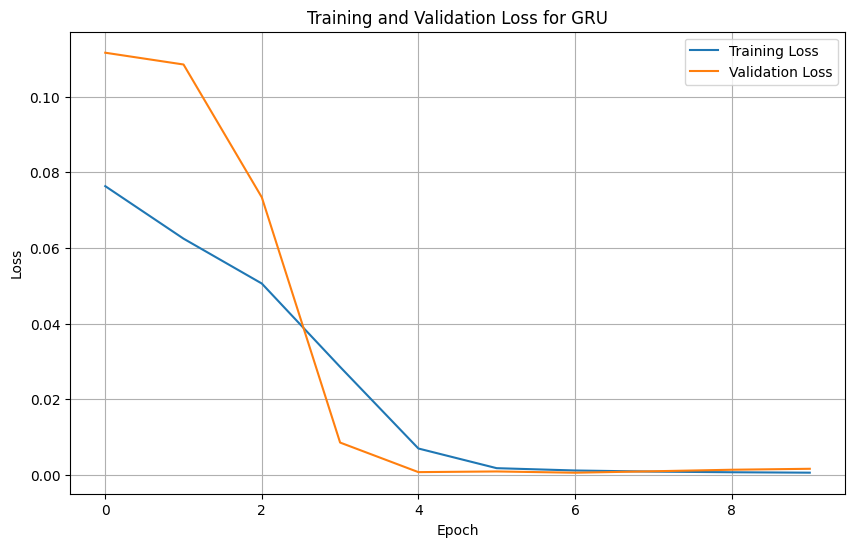

In [ ]:
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

##PERFORMA DAN PLOT UJI VARIASI 10, 0.02, 50

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


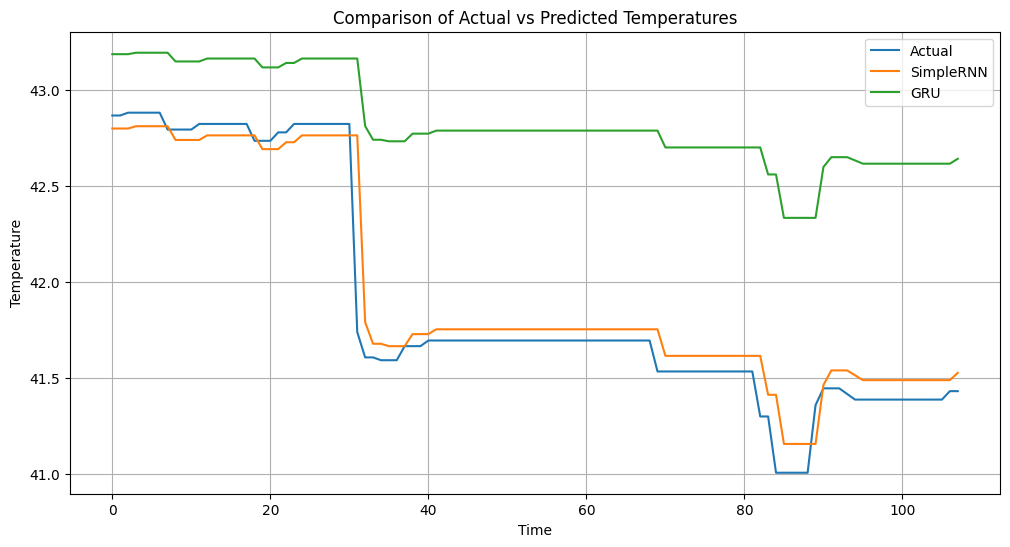

MSE for SimpleRNN: 0.018974437368450243
MSE for GRU: 1.014634912129188


In [ ]:

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    mse = mean_squared_error(y_test_original, pred)
    print(f"MSE for {name}: {mse}")

#VARIASI 10, 0.02, 100

##TRAIN-VAL VARIASI 10, 0.02, 100

In [ ]:
#ini buat pilih model keluarga rnn mana yang dipakai
def build_rnn_model(layer_type):
    model = Sequential()
    #input shape (1,2) itu maksudnya 1 baris mewakili timestep dan 2 fitur mewakili fitur yang digunakan untuk memprediksi data
    model.add(layer_type(100, activation='tanh', input_shape=(1, 2),return_sequences=True))##GANTI UNTUK VARIASI NEUORON
    model.add(layer_type(100, activation='tanh',return_sequences=True))
    model.add(layer_type(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=0.02), loss='mse')##GANTI UNTUK VARIASI LEARNING RATE
    return model
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(
        X_train, y_train,
        epochs=10,##GANTI UNTUK VARIASI EPOCHS##
        validation_data=(X_val, y_val),
        batch_size=1,
        verbose=1
    )
    histories[name] = history.history
    loss = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name} Loss: {loss}")


Training SimpleRNN...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0221 - val_loss: 0.0013
Epoch 2/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.5197e-04 - val_loss: 0.0017
Epoch 3/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1001e-04 - val_loss: 9.4528e-04
Epoch 4/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1209e-04 - val_loss: 0.0018
Epoch 5/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8998e-04 - val_loss: 0.0010
Epoch 6/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2935e-04 - val_loss: 0.0010
Epoch 7/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3476e-04 - val_loss: 8.8653e-04
Epoch 8/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7029e-04 - val_loss: 7.4179e-04
Epoch 9/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7051e-04 - val_loss: 9.3269e-04
Epoch 10/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3555e-04 - val_loss: 0.0010
SimpleRNN Loss: 0.0010288587072864175
Training GRU...
Epoch 1/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 5s 8

## PLOT TRAIN-VAL VARIASI 10, 0.02, 100

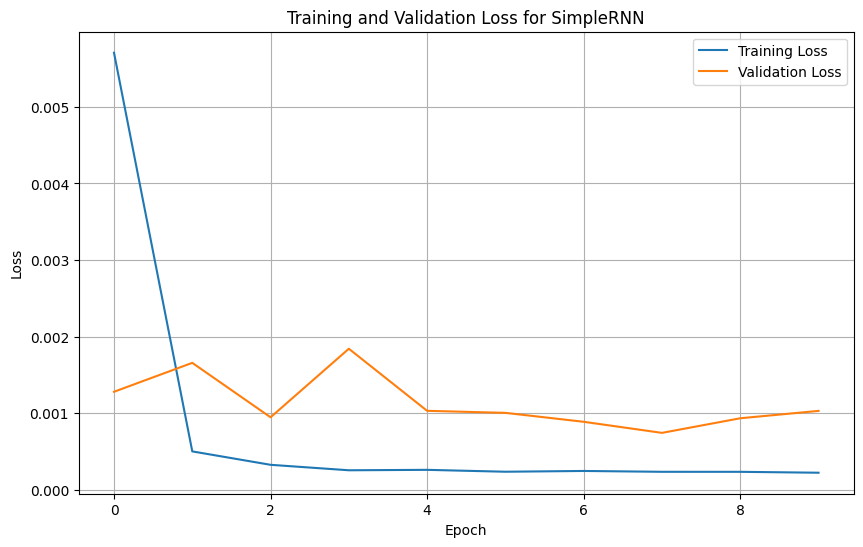

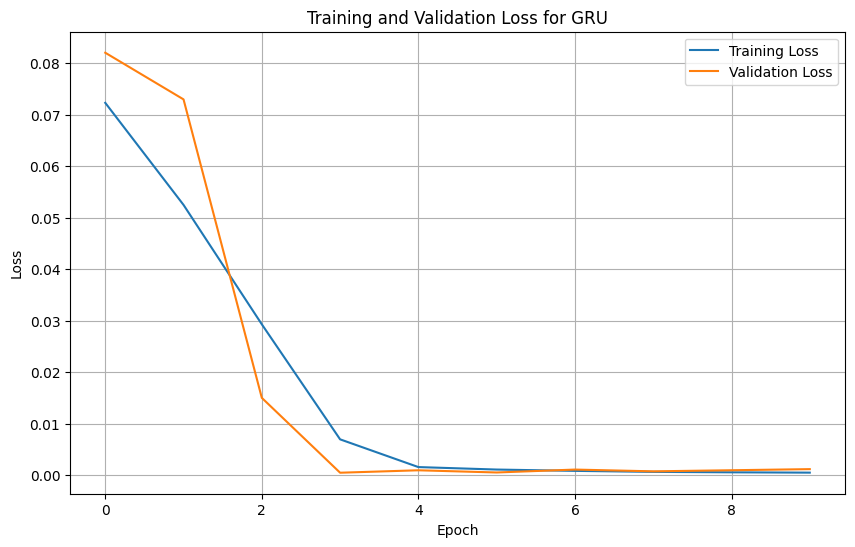

In [ ]:
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

## PERFORMA UJI PLOT UJI VARIASI 10, 0.02, 100

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


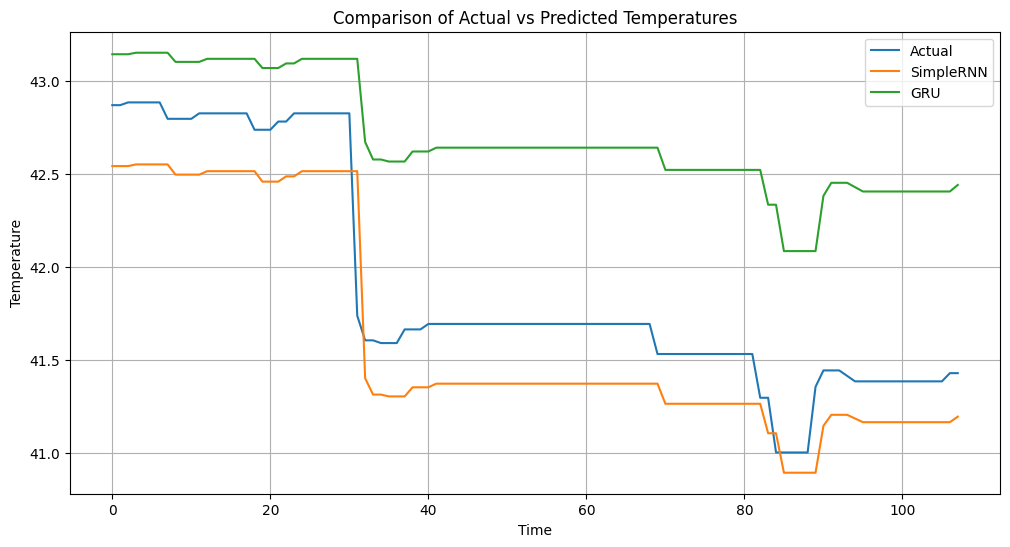

MSE for SimpleRNN: 0.0868599123547073
MSE for GRU: 0.7316489323551558


In [ ]:

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    mse = mean_squared_error(y_test_original, pred)
    print(f"MSE for {name}: {mse}")

#VARIASI 20, 0.01, 50

## TRAIN-VAL

In [ ]:
#model2 keluarga rnn yang dipakai
def build_rnn_model(layer_type):
    model = Sequential()
    model.add(layer_type(50, activation='tanh', input_shape=(1, 2),return_sequences=True))##GANTI UNTUK VARIASI NEUORON
    model.add(layer_type(50, activation='tanh',return_sequences=True))
    model.add(layer_type(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=0.01), loss='mse')##GANTI UNTUK VARIASI LEARNING RATE
    return model
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(
        X_train, y_train,
        epochs=20,##GANTI UNTUK VARIASI EPOCHS##
        validation_data=(X_val, y_val),
        batch_size=1,
        verbose=1
    )
    histories[name] = history.history
    loss = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name} Loss: {loss}")


Training SimpleRNN...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0257 - val_loss: 4.7926e-04
Epoch 2/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.3038e-04 - val_loss: 2.4993e-04
Epoch 3/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5940e-04 - val_loss: 8.1954e-05
Epoch 4/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5112e-04 - val_loss: 1.5029e-04
Epoch 5/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8070e-04 - val_loss: 1.9116e-04
Epoch 6/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1957e-04 - val_loss: 1.9628e-04
Epoch 7/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6118e-04 - val_loss: 2.0497e-04
Epoch 8/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0991e-05 - val_loss: 2.3131e-04
Epoch 9/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2979e-04 - val_loss: 3.0319e-04
Epoch 10/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7877e-04 - val_loss: 2.5824e-04
Epoch 11/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1082e-04 - 

## PLOT TRAIN-VAL

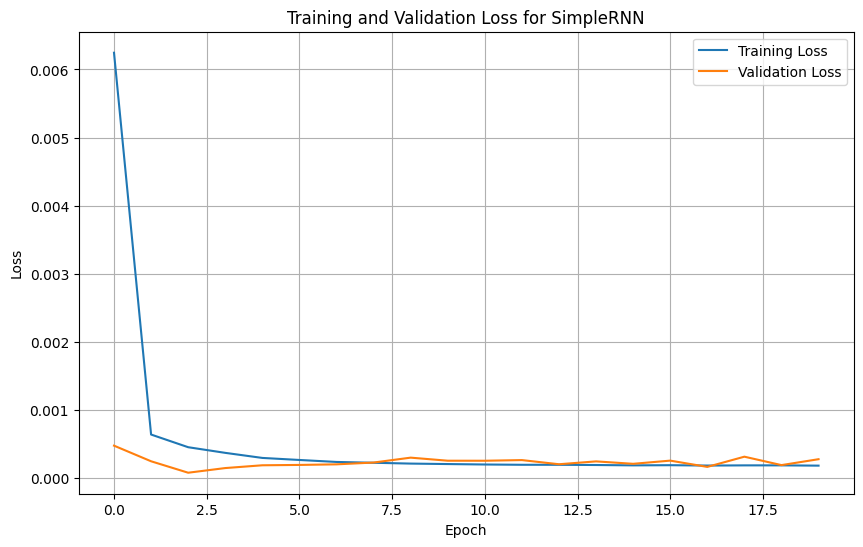

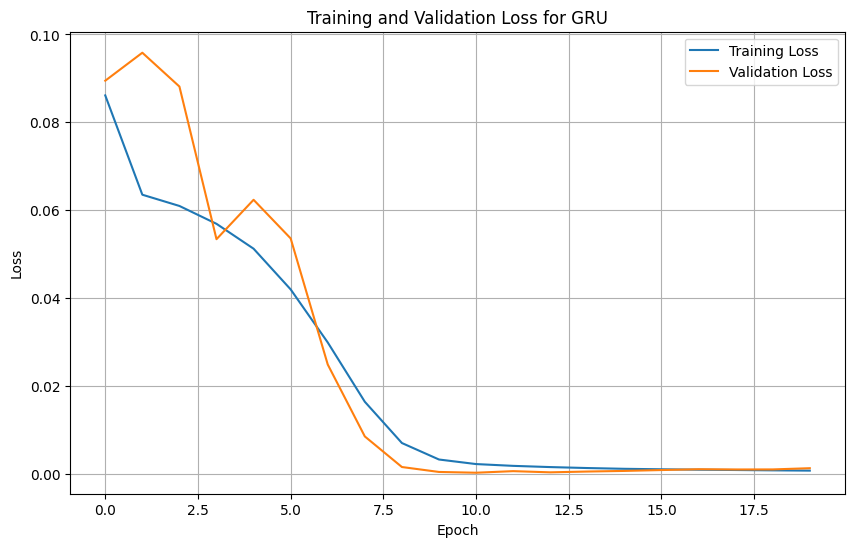

In [ ]:
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

## UJI

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


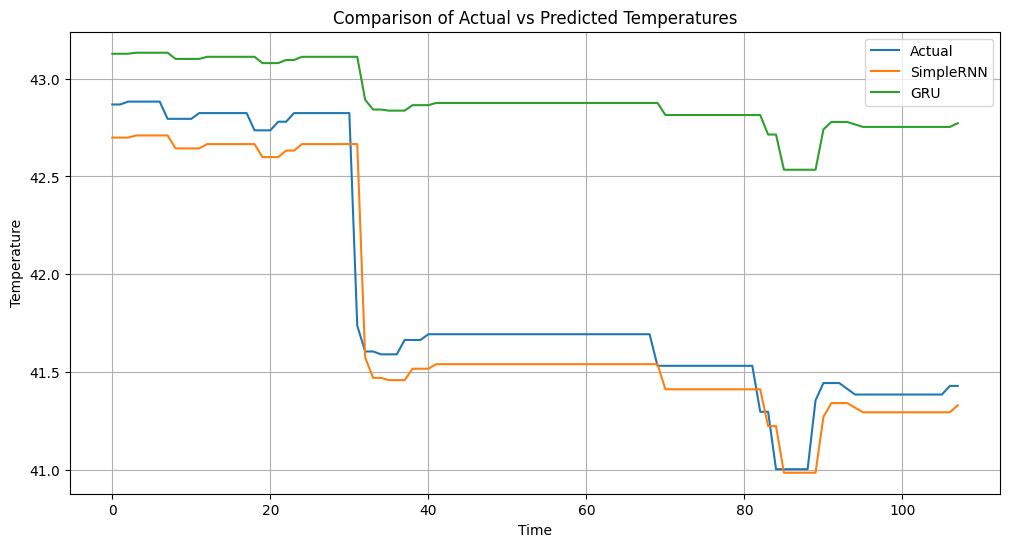

MSE for SimpleRNN: 0.02811705413513047
MSE for GRU: 1.201142018347379


In [ ]:

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    mse = mean_squared_error(y_test_original, pred)
    print(f"MSE for {name}: {mse}")

#VARIASI 20, 0.01, 100

## VAL-TRAIN

In [ ]:
# model2 kelaurga rnn yang dipakai
def build_rnn_model(layer_type):
    model = Sequential()
    model.add(layer_type(100, activation='tanh', input_shape=(1, 2),return_sequences=True))##GANTI UNTUK VARIASI NEUORON
    model.add(layer_type(100, activation='tanh',return_sequences=True))
    model.add(layer_type(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=0.01), loss='mse')##GANTI UNTUK VARIASI LEARNING RATE
    return model
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(
        X_train, y_train,
        epochs=20,##GANTI UNTUK VARIASI EPOCHS##
        validation_data=(X_val, y_val),
        batch_size=1,
        verbose=1
    )
    histories[name] = history.history
    loss = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name} Loss: {loss}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training SimpleRNN...
Epoch 1/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0372 - val_loss: 1.7697e-04
Epoch 2/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4001e-04 - val_loss: 1.3634e-04
Epoch 3/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2064e-04 - val_loss: 9.2554e-05
Epoch 4/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3456e-04 - val_loss: 9.3313e-05
Epoch 5/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4657e-04 - val_loss: 1.1262e-04
Epoch 6/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8991e-04 - val_loss: 1.7714e-04
Epoch 7/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7816e-04 - val_loss: 1.4907e-04
Epoch 8/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1009e-04 - val_loss: 1.0182e-04
Epoch 9/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2760e-04 - val_loss: 1.1442e-04
Epoch 10/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3505e-04 - val_loss: 1.5364e-04
Epoch 11/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 

## PLOT VAL-TRAIN

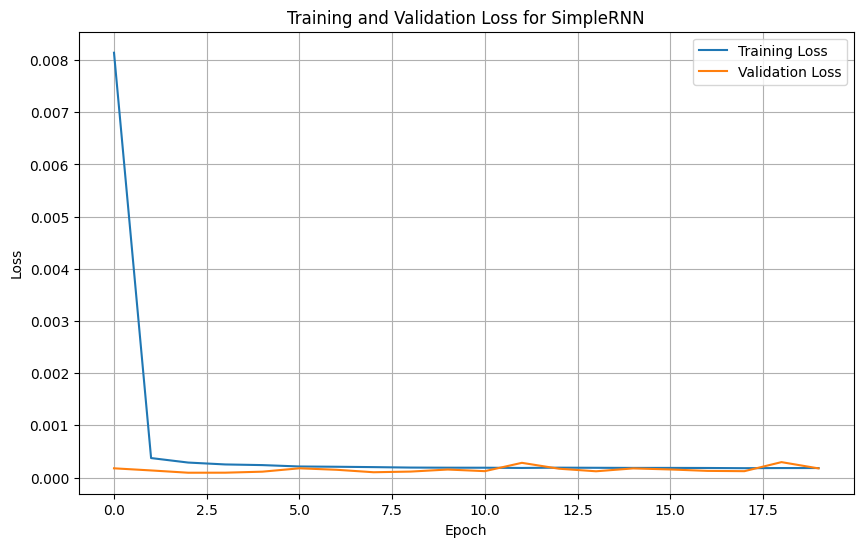

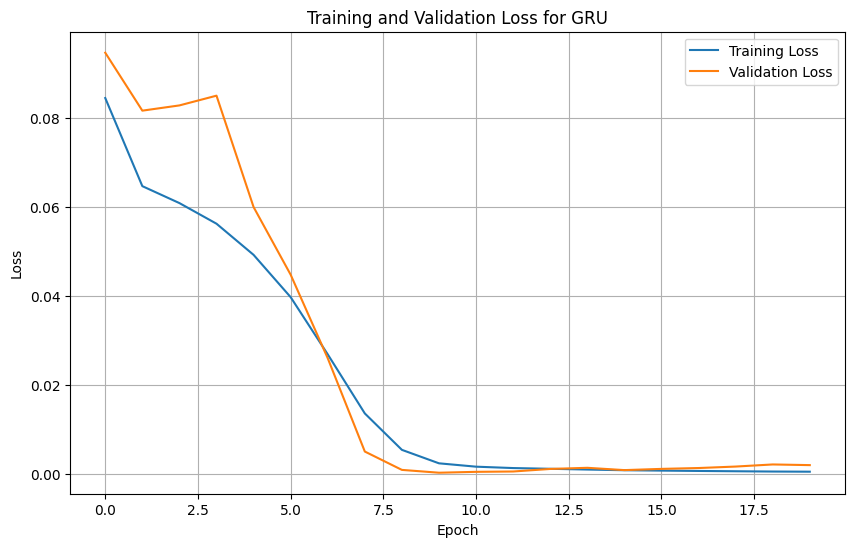

In [ ]:
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

## PERFORMA UJI

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


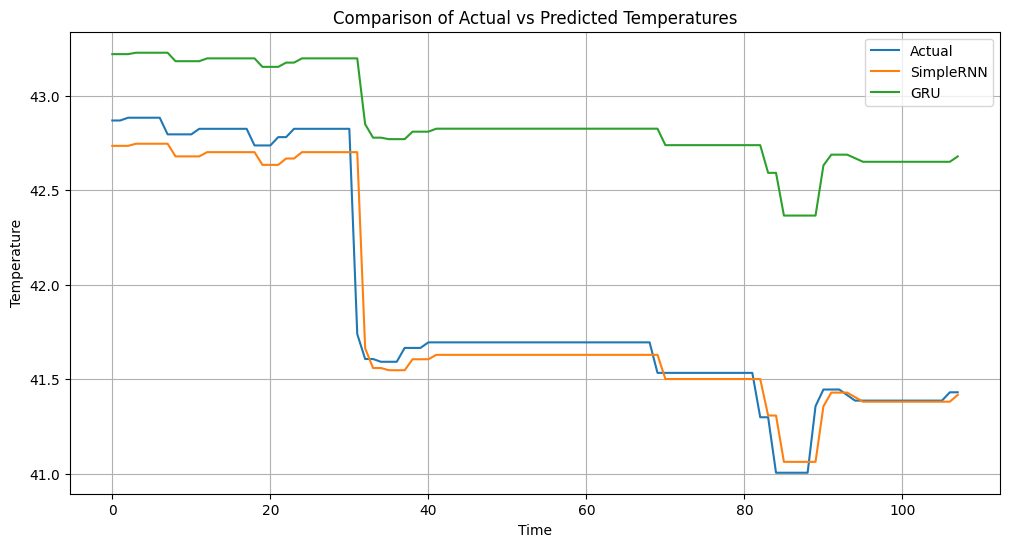

MSE for SimpleRNN: 0.016970365836403108
MSE for GRU: 1.079818621113162


In [ ]:

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    mse = mean_squared_error(y_test_original, pred)
    print(f"MSE for {name}: {mse}")

#VARIASI 20, 0.02, 50

## VAL-TRAIN

In [ ]:
#model2 keluarga rnn yang dipakai
def build_rnn_model(layer_type):
    model = Sequential()
    model.add(layer_type(50, activation='tanh', input_shape=(1, 2),return_sequences=True))##GANTI UNTUK VARIASI NEUORON
    model.add(layer_type(50, activation='tanh',return_sequences=True))
    model.add(layer_type(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=0.02), loss='mse')##GANTI UNTUK VARIASI LEARNING RATE
    return model
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(
        X_train, y_train,
        epochs=20,##GANTI UNTUK VARIASI EPOCHS##
        validation_data=(X_val, y_val),
        batch_size=1,
        verbose=1
    )
    histories[name] = history.history
    loss = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name} Loss: {loss}")
#menampilkan loss sepanjang pelatihan dan mengembalikan loss terakhir setelah pelatihan terakhir selesai
#kepentingan menampilkan losss sepanjang pelatih berguna untuk melihat seberapa sering model mengalami under atau overfitting
#harapannya frekuensi under atau overfitting mampu memberikan gambaran bagaimana model nanti bekerja pada data uji (cenderung under, overfit, atau bahkan lebih baik dari saat melatihnya)

Training SimpleRNN...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0232 - val_loss: 0.0015
Epoch 2/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4385e-04 - val_loss: 9.9833e-04
Epoch 3/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6104e-04 - val_loss: 9.8535e-04
Epoch 4/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9281e-04 - val_loss: 5.1393e-04
Epoch 5/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1812e-04 - val_loss: 7.5298e-04
Epoch 6/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2509e-04 - val_loss: 3.4316e-04
Epoch 7/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9344e-04 - val_loss: 3.1985e-04
Epoch 8/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8263e-04 - val_loss: 1.2185e-04
Epoch 9/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2036e-04 - val_loss: 2.5629e-04
Epoch 10/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3196e-04 - val_loss: 1.6221e-04
Epoch 11/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5443e-04 - val_

## PLOT VAL-TRAIN

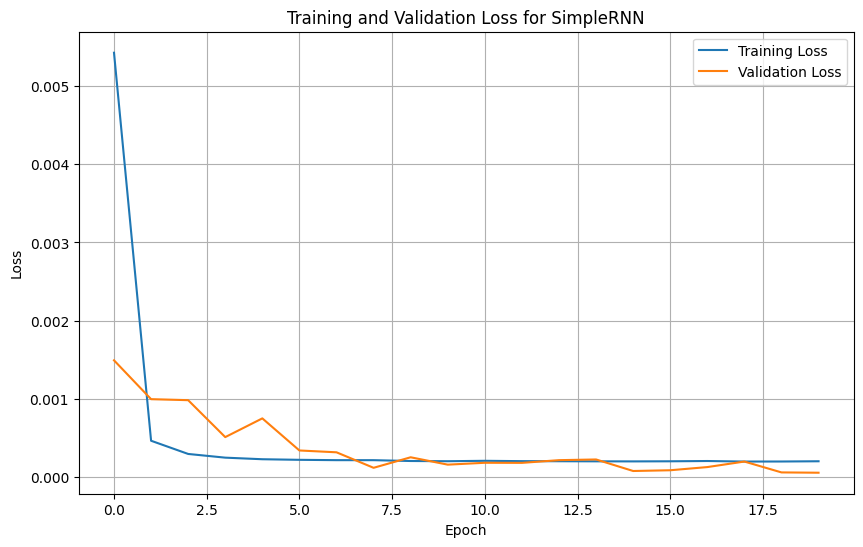

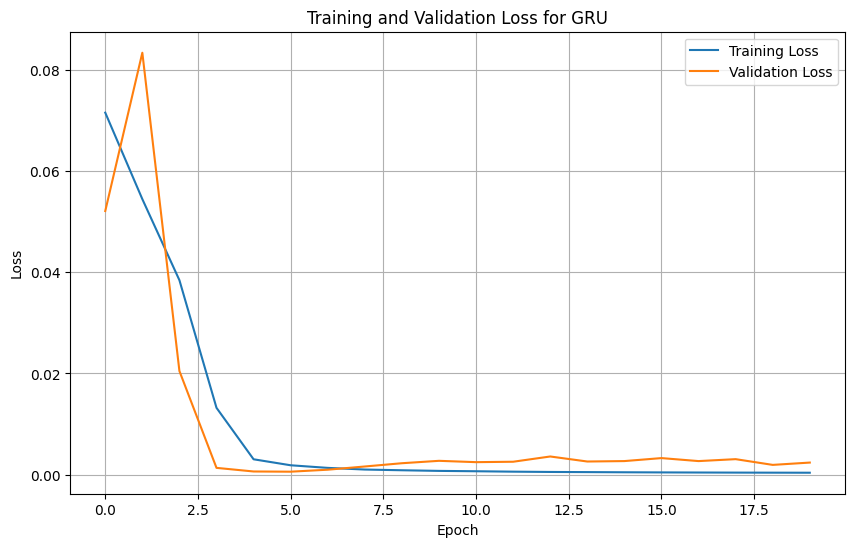

In [ ]:
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

## UJI

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


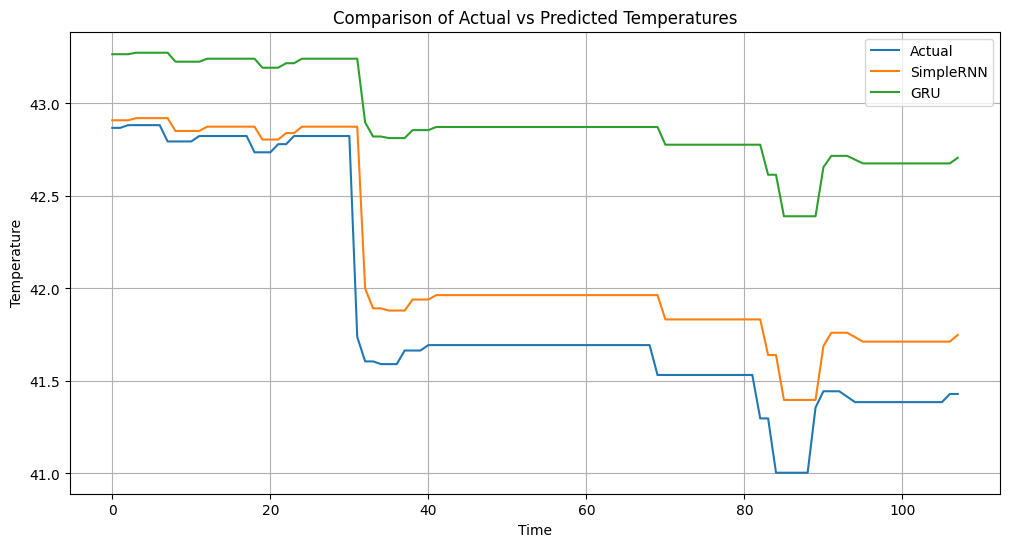

MSE for SimpleRNN: 0.08097763334303157
MSE for GRU: 1.1579036712899158


In [ ]:

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    mse = mean_squared_error(y_test_original, pred)
    print(f"MSE for {name}: {mse}")

#VARIASI 20, 0.02, 100

##VAL-TRAIN

In [ ]:
#model2 keluarga rnn yang dipakai
def build_rnn_model(layer_type):
    model = Sequential()
    model.add(layer_type(100, activation='tanh', input_shape=(1, 2),return_sequences=True))##GANTI UNTUK VARIASI NEUORON
    model.add(layer_type(100, activation='tanh',return_sequences=True))
    model.add(layer_type(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=0.02), loss='mse')##GANTI UNTUK VARIASI LEARNING RATE
    return model
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(
        X_train, y_train,
        epochs=20,##GANTI UNTUK VARIASI EPOCHS##
        validation_data=(X_val, y_val),
        batch_size=1,
        verbose=1
    )
    histories[name] = history.history
    loss = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name} Loss: {loss}")


Training SimpleRNN...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0164 - val_loss: 1.4375e-04
Epoch 2/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3039e-04 - val_loss: 1.2565e-04
Epoch 3/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6848e-04 - val_loss: 1.8894e-04
Epoch 4/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2562e-04 - val_loss: 1.1620e-04
Epoch 5/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9989e-05 - val_loss: 2.0890e-04
Epoch 6/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4302e-04 - val_loss: 1.7781e-04
Epoch 7/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3513e-04 - val_loss: 1.5203e-04
Epoch 8/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5161e-05 - val_loss: 2.2422e-04
Epoch 9/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2798e-04 - val_loss: 1.5154e-04
Epoch 10/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1532e-04 - val_loss: 1.6871e-04
Epoch 11/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0517e-04 - 

##PLOT VAL-TRAIN

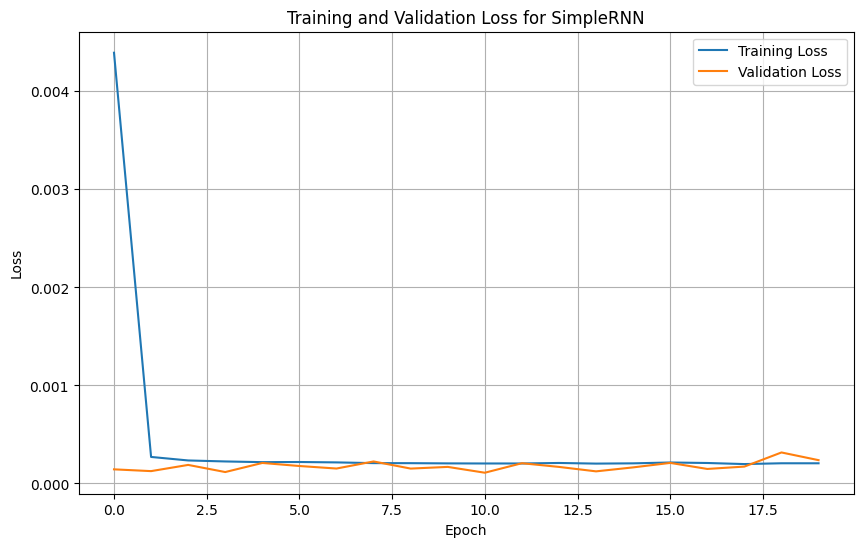

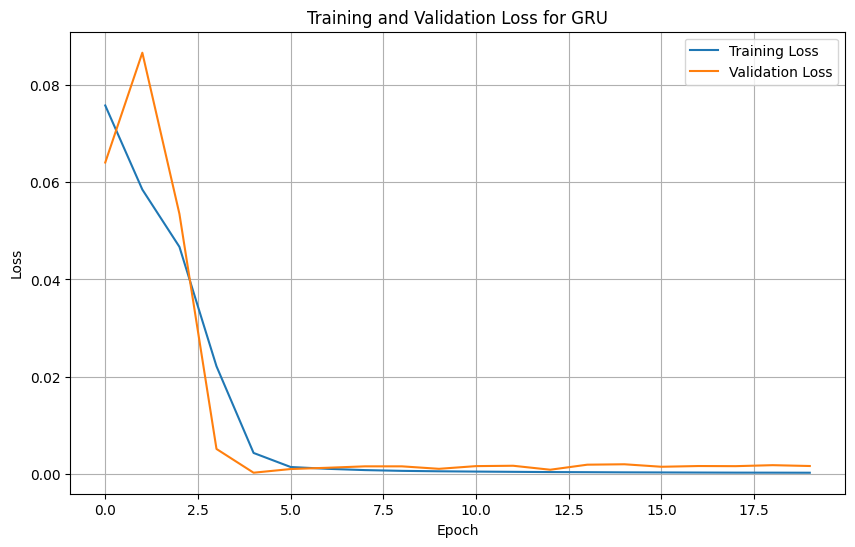

In [ ]:
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

##UJI

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


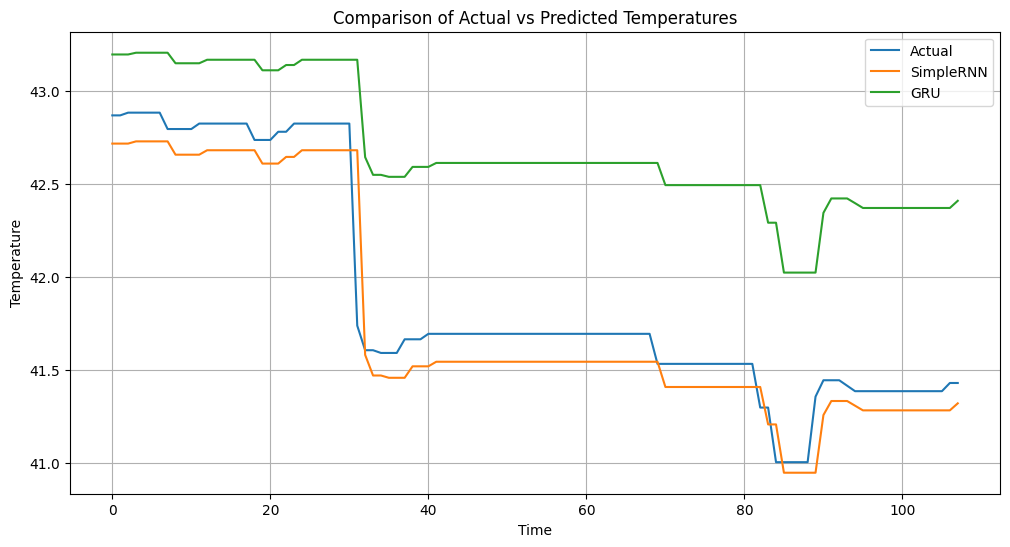

MSE for SimpleRNN: 0.027721850668816207
MSE for GRU: 0.6989787524942016


In [ ]:

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    mse = mean_squared_error(y_test_original, pred)
    print(f"MSE for {name}: {mse}")